# Plus = add interannual variablity,Analysis of Monthly Mean Historical Meteorologic Variables from LOCA and BCSD

This notebook analyzes meteorologic variables from the historical scenario (1950-2005) from the LOCA and BCSD datasets. Each dataset is compared to its respective gridded observations used for training -- Livneh observations for LOCA and Maurer observations for BCSD.

Variables include:
- Precipitation
- Temperature

In [3]:
from loca import print_date
print_date()

Last executed: 2019-05-21 21:51:58.450081 by jvano on r6i6n31


# Imports and Options

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt

import xarray as xr

from loca.data_catalog import load_monthly_historical_met_datasets, load_daily_livneh_meteorology, resample_monthly_data
from loca.utils import calc_change

# models = ['ACCESS1-0', 'CanESM2', 'CNRM-CM5', 'MIROC5', 'MRI-CGCM3']
# models = ['CCSM4', 'CNRM-CM5']
# models = ['ACCESS1-0', 'CanESM2', 'CCSM4', 'CNRM-CM5', 'MIROC5', 'MRI-CGCM3']
# models = ['ACCESS1-0', 'CanESM2'] 
# models = ['ACCESS1-0', 'CanESM2','MIROC5', 'MRI-CGCM3','bcc-csm1-1']

# list of 20, without issues
# models = ['ACCESS1-0', 'CanESM2', 'MIROC5', 'MRI-CGCM3', 'bcc-csm1-1', 'bcc-csm1-1-m', 'CCSM4', 'CESM1-BGC', 'CMCC-CM', 'GISS-E2-R', 'HadGEM2-CC', 'HadGEM2-ES', 'inmcm4', 'IPSL-CM5A-MR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MPI-ESM-LR', 'MPI-ESM-MR', 'NorESM1-M', 'GFDL-ESM2G']

# list of 25, without issues:
# models = ['ACCESS1-0', 'CanESM2', 'MIROC5', 'MRI-CGCM3', 'bcc-csm1-1', 'bcc-csm1-1-m', 'CCSM4',
#           'CESM1-BGC', 'CMCC-CM', 'GISS-E2-R', 'HadGEM2-CC', 'HadGEM2-ES', 'inmcm4', 'IPSL-CM5A-MR',
#           'MIROC-ESM', 'MIROC-ESM-CHEM', 'MPI-ESM-LR', 'MPI-ESM-MR', 'NorESM1-M', 'GFDL-ESM2G', 
#           'CNRM-CM5', 'CSIRO-Mk3-6-0', 'GFDL-ESM2M','GFDL-CM3', 'HadGEM2-AO']
# models = ['ACCESS1-0', 'CanESM2','MIROC5', 'MRI-CGCM3','bcc-csm1-1'] #current 5
models = ['ACCESS1-0', 'CanESM2'] #testing

met_vars = ['pcp', 't_mean']

#cache is written in script xxx (TODO need to move it to its own script)
read_cache = True

In [5]:
from dask.distributed import Client
# client = Client(scheduler_file='/glade/u/home/jhamman/workdir/scheduler_file.json')
client = Client(scheduler_file=os.path.join(os.environ['HOME'], 'scheduler_file.json'))
client

Client Scheduler: tcp://10.148.10.15:42657 Dashboard: proxy/8787/status,Cluster Workers: 36 Cores: 144 Memory: 435.96 GB


In [6]:
# # attempt reading in obs - see next few slides... much better to put it 
# DEFAULT_RESOLUTION = '8th'

# def load_monthly_obs_met_datasets(resolution=DEFAULT_RESOLUTION,
#                                          models=None, **kwargs):
#     print('load_monthly_historical_met_datasets', flush=True)

#     data['livneh'] = load_monthly_livneh_meteorology(resolution=resolution,
#                                                      **kwargs)
#     data['maurer'] = load_monthly_maurer_meteorology(resolution=resolution,
#                                                      **kwargs)

#     return data


In [5]:
# met_obs_data = load_monthly_obs_met_datasets(models=models, autoclose=True, parallel=True)

# Load Data

In [7]:
hist_cmip_met_data = {}
if read_cache:
    print("reading values from cache")
    for key in ['loca', 'bcsd']:
        hist_cmip_met_data[key] = xr.open_mfdataset(
            os.path.join(os.environ['TMPDIR'], f'monthly_cmip_met_hist.{key}_*.nc'),
            concat_dim='gcm', chunks={'time': 72})
    print("finished reading from cache")
    ds = hist_cmip_met_data['loca']
    print(ds['pcp'])
    #TODO once get obs load separate won't have to do work around below
    single = ['ACCESS1-0']
    obs_data = load_monthly_historical_met_datasets(models=single, autoclose=True, parallel=True)
    print("finished reading obs")

else:
    print("reading values from files directly")
    met_data = load_monthly_historical_met_datasets(models=models, autoclose=True, parallel=True)

reading values from cache
finished reading from cache
<xarray.DataArray 'pcp' (gcm: 25, time: 672, lat: 224, lon: 464)>
dask.array<shape=(25, 672, 224, 464), dtype=float64, chunksize=(1, 72, 224, 464)>
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2005-12-01
  * lon      (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
  * lat      (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * gcm      (gcm) <U14 'ACCESS1-0' 'CCSM4' ... 'bcc-csm1-1' 'inmcm4'
load_monthly_historical_met_datasets
load_monthly_cmip_met_datasets
load_monthly_loca_meteorology
load_daily_loca_meteorology
load_monthly_bcsd_meteorology
load_bcsd_dataset
load_monthly_livneh_meteorology
load_daily_livneh_meteorology
load_monthly_maurer_meteorology
load_daily_maurer_meteorology
finished reading obs


In [8]:
# merging
met_data = {**obs_data, **hist_cmip_met_data}

#list(met_data.keys())
#print(met_data)

In [8]:
# hist_cmip_met_data['bcsd']
# hist_cmip_met_data['bcsd']['pcp'].isel(gcm=0, time=0).plot()

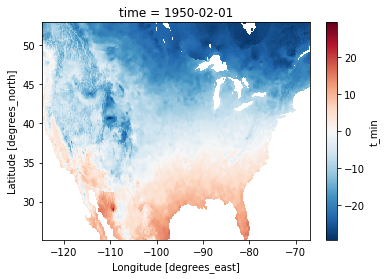

In [9]:
met_data['maurer']['t_min'].isel(time=1).plot()
# met_data['maurer']['pcp'].isel(time=1).plot()

In [10]:
# client.restart()

In [10]:
epoch = slice('1969-10-01', '1999-09-30') # updated to be water year
#thought:  should probably change epoch to be calendar year as YS or AS will have problems.
print("finished slice")

# mask = met_data['maurer']['t_mean'].isel(time=0).squeeze().notnull()
# Use mask for maurer for all figs so difference plot ok
mask = met_data['bcsd']['t_mean'].isel(gcm=0, time=0).squeeze().notnull()

epoch_means = dict((k, resample_monthly_data(ds.sel(time=epoch), freq='AS',
                                             chunks={'lat': 100, 'lon': 100}).mean('time').where(mask).persist()) for (k, ds) in met_data.items())
print("finished epoch_means")
ens_means = dict((k, resample_monthly_data(ds.sel(time=epoch), freq='AS', chunks={'lat': 100, 'lon': 100}).mean('time').mean('gcm').where(mask).persist()) for (k, ds) in hist_cmip_met_data.items())
print("finished ens_means")

# for debugging
# epoch_means = {}
# for k, ds in met_data.items():
#     print(k, flush=True)
#     epoch_means[k] = ds.sel(time=epoch).mean('time').where(mask).compute()

finished slice
finished epoch_means
finished ens_means


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.148.10.15:58075 remote=tcp://10.148.10.15:42657>


In [9]:
# calculate interannual variability
# from Ethan: ds["pcp"].resample(time="YS").sum(dim="time").std(dim="time"
                                          
epoch_interannual = dict((k, resample_monthly_data(ds.sel(time=epoch), freq='AS',
                                                   chunks={'lat': 100, 'lon': 100}).std('time').where(mask).persist()) for (k, ds) in met_data.items())
print("finished epoch_interannual")

finished epoch_interannual


In [10]:
ens_interannual_means = dict((k, resample_monthly_data(ds.sel(time=epoch), freq='AS', 
                                                       chunks={'lat': 100, 'lon': 100}).std('time').mean('gcm').where(mask).persist()) for (k, ds) in hist_cmip_met_data.items())
print("finished ens_means")

finished ens_means


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.148.10.13:44886 remote=tcp://10.148.10.13:49093>


In [ ]:
# trying...TODO  JAV

ens_interannual_std = dict((k, resample_monthly_data(ds.sel(time=epoch), freq='AS', 
                                                       chunks={'lat': 100, 'lon': 100}).std('time').std('gcm').where(mask).persist()) for (k, ds) in hist_cmip_met_data.items())
print("finished ens_means")

In [13]:
#list(met_data.keys())
#ds = met_data['bcsd']
#print(ds['time'])

In [14]:
#test = slice('1969-09-01', '1969-12-30')
#test = slice('1999-09-01', '1999-12-30')
#ds = met_data['bcsd']
#ds['pcp'].sel(time=test)

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://10.148.10.23:58659 remote=tcp://10.148.10.23:57964>


# Plots

For the monthly hydrologic variables, we will make 2 types of plots:

1. Maps of all datasets plotted as actual values (epoch, seasonal, and monthly means)
2. Maps of all datasets with LOCA and BCSD datasets plotted as biases relative to observation based VIC simulations (epoch, seasonal, and monthly means)

In [13]:
kwargs = {'pcp': {'vmin': 0, 'vmax': 2500},
          't_mean': {'vmin': -10, 'vmax': 20},}
units = {'pcp': 'mm', 't_mean': 'C'}

In [23]:
# display (epoch_means)
# display (epoch_interannual)

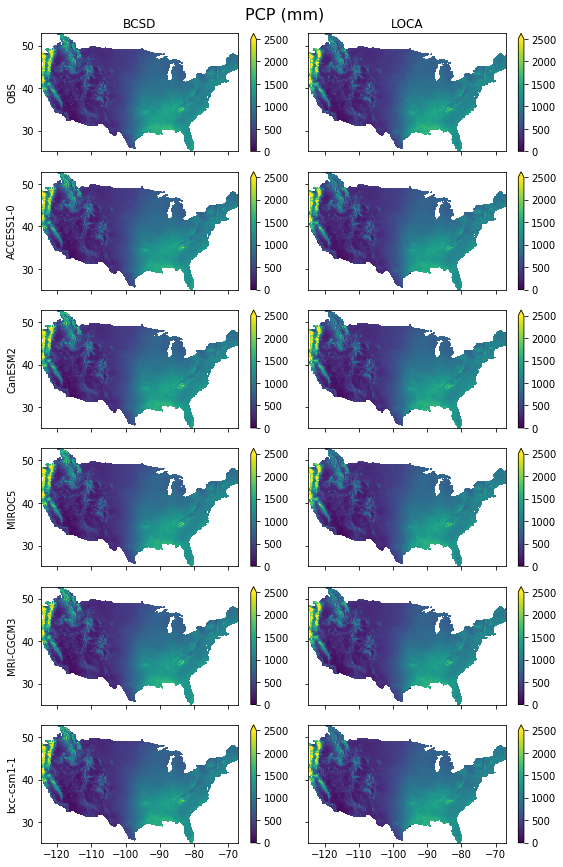

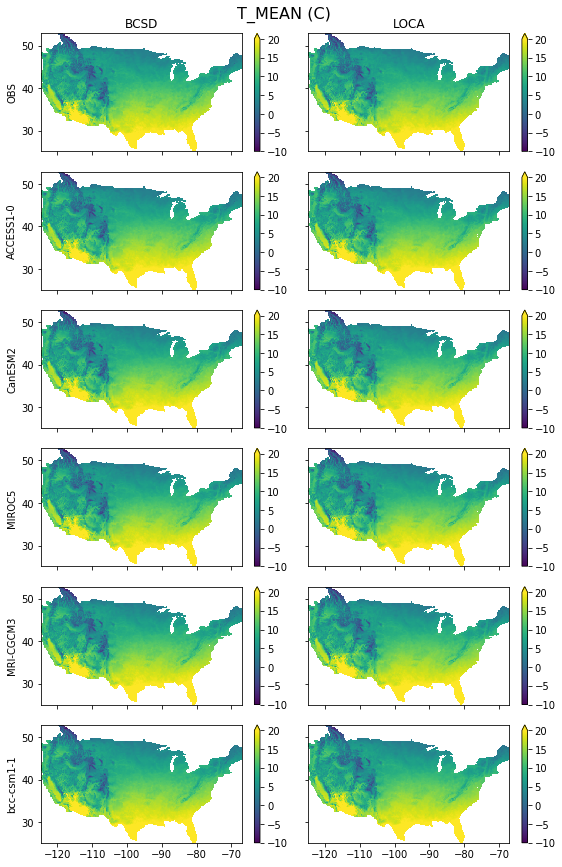

In [10]:
#DON'T USE

nrows = 1 + len(models)
ncols = 2

for var in met_vars:
    
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, sharey=True, figsize=(4*ncols, 2*nrows))
    
    for col, (title, obs_data, ds_data) in enumerate([('BCSD', epoch_means['maurer'], epoch_means['bcsd']),
                                                      ('LOCA', epoch_means['livneh'], epoch_means['loca'])]):
        
        ax = axes[0, col]
        obs_data[var].plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
        
        if col == 0:
            ax.set_ylabel('OBS')
        
        ax.set_title(title)
        
        for row, model in enumerate(models, 1):
            ax = axes[row, col]
            ds_data[var].sel(gcm=model).plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
            
            if col == 0:
                ax.set_ylabel(model)
                
    title = var.upper()
    title += ' (%s)' % units[var]
    unit_str = units[var]
    fig.suptitle(title, fontsize=16, y=1.0)
    fig.tight_layout()     
    fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/{var}_{unit_str}_monthly_historic_met_30WYs.png', dpi=300, bbox_inches='tight')

In [12]:
# ds_data[var].sel(gcm=model).plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])

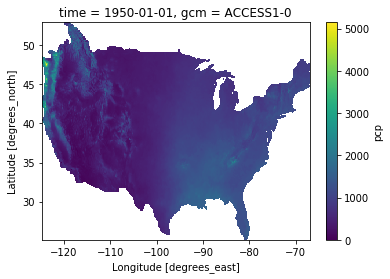

In [16]:
epoch_means['maurer']['pcp'].plot()  #ask joe what this means... 

In [ ]:
# NEW:  Ensemble added (FIG A and B)
nrows = 2 + len(models)
ncols = 2

# met_vars = ['t_mean', 'pcp']
met_vars = ['pcp']
for var in met_vars:
    
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, sharey=True, figsize=(4*ncols, 2*nrows))
    
    for col, (title, obs_data, ensemble, ds_data) in enumerate([('BCSD', epoch_means['maurer'], ens_means['bcsd'], epoch_means['bcsd']),
                                                      ('LOCA', epoch_means['livneh'], ens_means['loca'], epoch_means['loca'])]):
        
        ax = axes[0, col]
        obs_data[var].plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
        ax.set_title(title)
        
        if col == 0:
            ax.set_ylabel('OBS')
        
        ax = axes[1, col]
        ensemble[var].plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
        if col == 0:
            ax.set_ylabel('Ensemble Mean')
        
        for row, model in enumerate(models, 2):
            ax = axes[row, col]
            ds_data[var].sel(gcm=model).plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
            
            if col == 0:
                ax.set_ylabel(model)
                
    title = var.upper()
    title += ' (%s)' % units[var]
    unit_str = units[var]
    fig.suptitle(title, fontsize=16, y=1.0)
    fig.tight_layout()     
#     fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/{var}_{unit_str}_monthly_historic_met_ens_30WYs.png', dpi=300, bbox_inches='tight')

In [ ]:
# NEW: Interannual Variability (trying)

# XXX this is where I stopped.  1. Plot to make sure this works.  2. Add BCSD epoch_interannual. 3. run std dev across models (of std dev) (see above) 
# 4. set bounds on fig 0 to 300 for means, 0 to 50 for std dev  5.  do diff plot  6. add std dev to plot (possibly as third fig obs, means, std dev) 
nrows = 2 + len(models)
ncols = 2

# met_vars = ['t_mean', 'pcp']
met_vars = ['pcp']
for var in met_vars:
    
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, sharey=True, figsize=(4*ncols, 2*nrows))
        
    for col, (title, obs_data, ensemble, ds_data) in enumerate([('BCSD', epoch_means['maurer'], ens_interannual_means['bcsd'], epoch_interannual['bcsd']),  
                                                                ('LOCA', epoch_means['livneh'], ens_interannual_means['loca'], epoch_interannual['loca'])]):
        
#    only changed interannual.

        ax = axes[0, col]
        obs_data[var].plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
        ax.set_title(title)
        
        if col == 0:
            ax.set_ylabel('OBS')
        
        ax = axes[1, col]
        ensemble[var].plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
        if col == 0:
            ax.set_ylabel('Ensemble Mean')
        
        for row, model in enumerate(models, 2):
            ax = axes[row, col]
            ds_data[var].sel(gcm=model).plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])
            
            if col == 0:
                ax.set_ylabel(model)
                
    title = var.upper()
    title += ' (%s)' % units[var]
    unit_str = units[var]
    fig.suptitle(title, fontsize=16, y=1.0)
    fig.tight_layout()     
    fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/{var}_{unit_str}_monthly_historic_met_ens_interannual_30WYs.png', dpi=300, bbox_inches='tight')

In [14]:
#USEFUL WAY TO MAKE A PLOT
#ens_means['loca']['pcp'].plot()

KilledWorker: ("('open_dataset-concatenate-2444580d43bb1ba5a575c546fc9da7ff', 40, 0, 0)", 'tcp://10.148.14.3:38754')

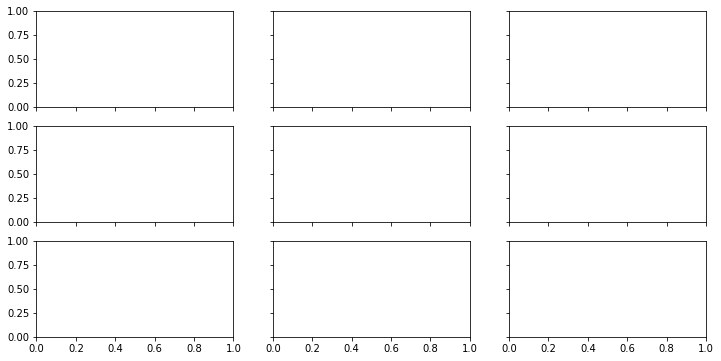

In [15]:
# FIG C and D
met_vars = ['pcp', 't_mean']
# met_vars = ['pcp']

units = {'pcp': 'mm', 't_mean': 'C'}

nrows = 1 + len(models)
ncols = 2


diff_kws = {False: {'pcp': {'vmin': -100, 'vmax': 100, 'cmap': 'RdBu'}, 't_mean': {'vmin': -1, 'vmax': 1, 'cmap': 'RdBu_r'}},
            True: {'pcp': {'vmin': -25, 'vmax': 25, 'cmap': 'RdBu'}}}


for var in met_vars:
    
    for pct in [True, False]:
  
        if var not in diff_kws[pct]:
            continue
    
        fig, axes = plt.subplots(ncols=ncols + 1, nrows=nrows, sharex=True, sharey=True, figsize=(12, 2*nrows))

        for col, (title, obs_data, ds_data) in enumerate([('BCSD', epoch_means['maurer'], epoch_means['bcsd']),
                                                          ('LOCA', epoch_means['livneh'], epoch_means['loca'])]):

            ax = axes[0, col]
            obs_data[var].plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])

            if col == 0:
                ax.set_ylabel('OBS')

            ax.set_title(title)
    
            diff = calc_change(obs_data[var], ds_data[var], pct=pct).persist()
            for row, model in enumerate(models, 1):
                ax = axes[row, col]
                diff.sel(gcm=model).plot.pcolormesh(ax=ax, add_labels=False, **diff_kws[pct][var])

                if col == 0:
                    ax.set_ylabel(model)

        ax = axes[0, -1]
        calc_change(epoch_means['maurer'][var], epoch_means['livneh'][var], pct=pct).plot.pcolormesh(ax=ax, add_labels=False, **diff_kws[pct][var])
        ax.set_title('LOCA - BCSD')  

        diff = calc_change(epoch_means['bcsd'][var], epoch_means['loca'][var], pct=pct).persist()
        for row, model in enumerate(models, 1):
            ax = axes[row, -1]  
            diff.sel(gcm=model).plot.pcolormesh(ax=ax, add_labels=False, **diff_kws[pct][var])

            
        title = var.upper()
        title += ' (%s)' % units[var]
        if pct:
            title += ' (%)'
            unit_str = 'pct'
        else:
            unit_str = units[var]
        fig.suptitle(title, fontsize=16, y=1.01)
        fig.tight_layout()  
        fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/diff_{var}_{unit_str}_monthly_historic_met_30WYs.png', dpi=300, bbox_inches='tight')
        #fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/diff_{var}_{unit_str}_monthly_historic_met_80s-90s.png', dpi=300, bbox_inches='tight')

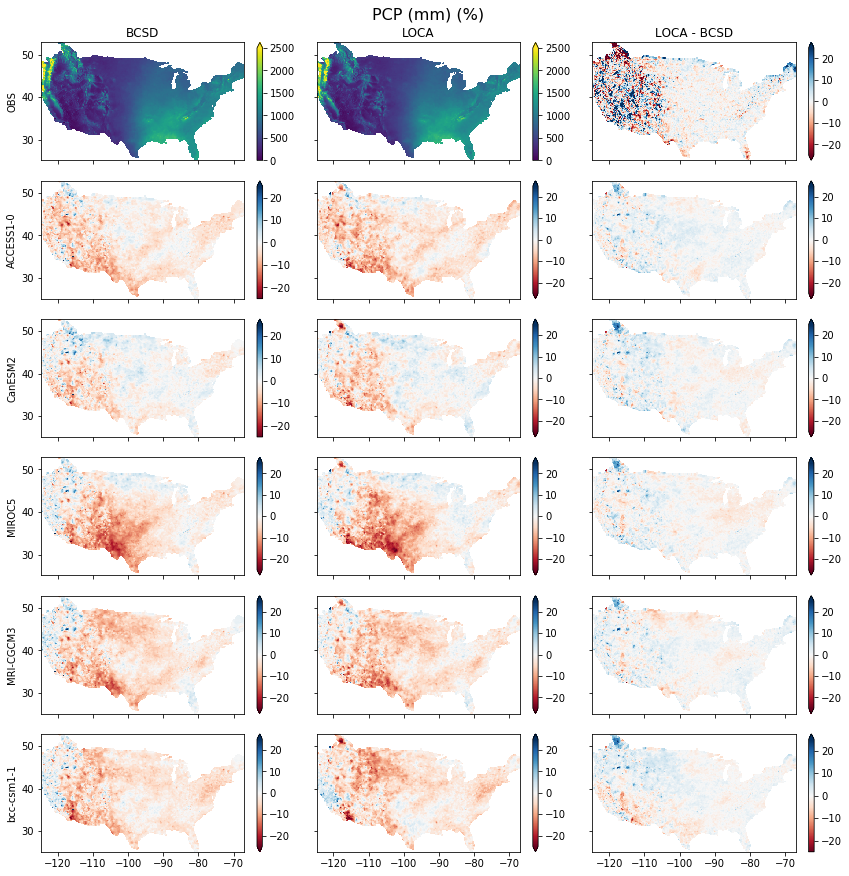

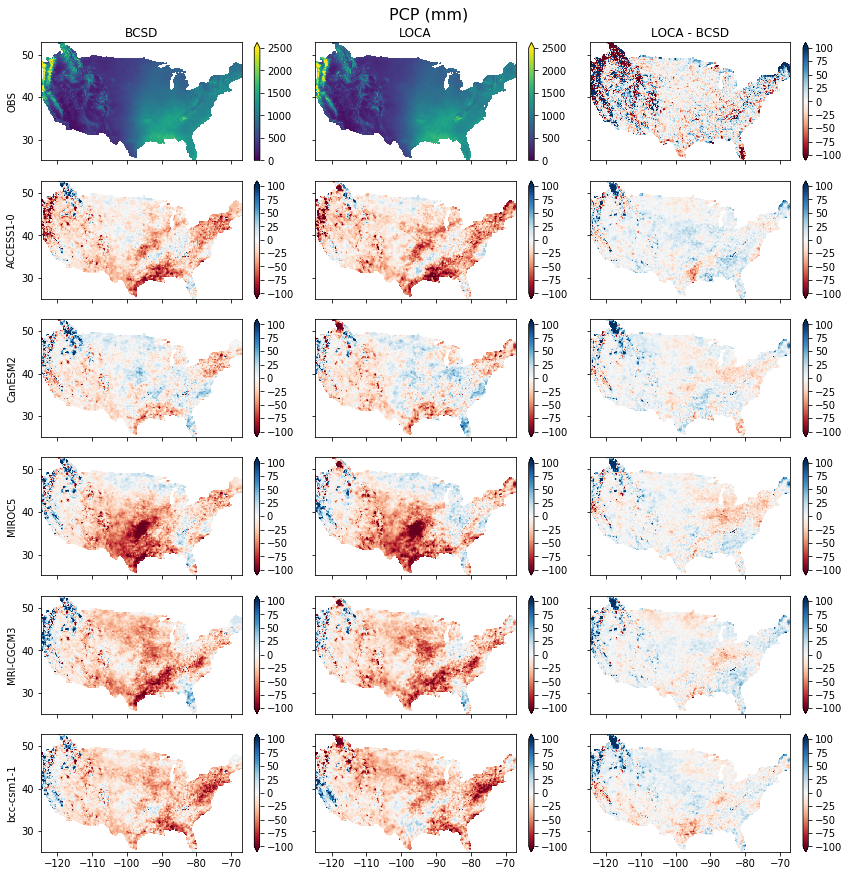

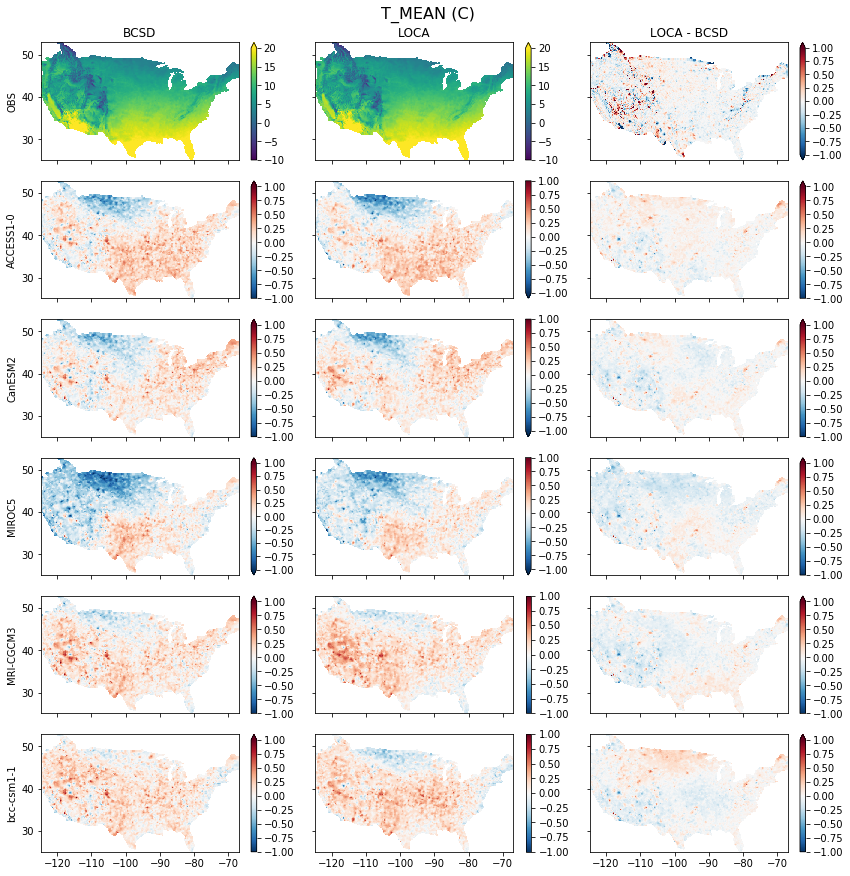

In [17]:
cache = {}

nrows = 1 + len(models)
ncols = 2

for var in met_vars:
    
    for pct in [True, False]:
        
        if var not in diff_kws[pct]:
            continue
    

        fig, axes = plt.subplots(ncols=ncols + 1, nrows=nrows, sharex=True, sharey=True, figsize=(12, 2*nrows))

        for col, (title, obs_data, ds_data) in enumerate([('BCSD', epoch_means['maurer'], epoch_means['bcsd']),
                                                          ('LOCA', epoch_means['livneh'], epoch_means['loca'])]):

            ax = axes[0, col]
            obs_data[var].plot.pcolormesh(ax=ax, add_labels=False, **kwargs[var])

            if col == 0:
                ax.set_ylabel('OBS')

            ax.set_title(title)
    
            diff = calc_change(obs_data[var], ds_data[var], pct=pct).persist()
            for row, model in enumerate(models, 1):
                ax = axes[row, col]
                diff.sel(gcm=model).plot.pcolormesh(ax=ax, add_labels=False, **diff_kws[pct][var])
                cache[(row, col)] = diff.sel(gcm=model)
                if col == 0:
                    ax.set_ylabel(model)

        ax = axes[0, -1]
        calc_change(epoch_means['maurer'][var], epoch_means['livneh'][var], pct=pct).plot.pcolormesh(ax=ax, add_labels=False, **diff_kws[pct][var])
        ax.set_title('LOCA - BCSD')

        for row, model in enumerate(models, 1):
            ax = axes[row, -1]
            diff = cache[(row, 0)] - cache[(row, 1)] #DIFF OF A DIFF JAV, right?
            diff.plot.pcolormesh(ax=ax, add_labels=False, **diff_kws[pct][var])

            
        title = var.upper()
        title += ' (%s)' % units[var]
        if pct:
            title += ' (%)'
            unit_str = 'pct'
        else:
            unit_str = units[var]
        fig.suptitle(title, fontsize=16, y=1.01)
        fig.tight_layout()  
        fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/diff2_{var}_{unit_str}_monthly_historic_met_30WYs.png', dpi=300, bbox_inches='tight')

In [ ]:
# cleanup 
plt.close('all')